<a href="https://colab.research.google.com/github/bigyunicorn/fastai22/blob/main/lesson02/dataAugmentation_fastbookExample_widgets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai

In [ ]:
from ipywidgets import *

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

In [ ]:
fns = get_image_files(path)
fns

(#560) [Path('bears/black/d451a1ac-7081-47a4-8c72-cf1494ee183e.jpg'),Path('bears/black/67631f03-12eb-48d7-834c-61c1ad019eff.jpg'),Path('bears/black/84783f50-84df-4691-8a02-73fae45f5676.jpg'),Path('bears/black/51a81d24-7a5c-4ebe-b75f-c0382e71b46f.jpg'),Path('bears/black/f4397717-f995-463e-b33c-a417e96b11a0.jpg'),Path('bears/black/2fd10e9b-e136-4b84-b04d-be9b24a3d5c6.jpg'),Path('bears/black/3ed13002-1b7e-4fa0-94a9-6fa2b0f80386.jpg'),Path('bears/black/4bd70a78-fd33-458b-866b-3a96bc99fa1e.jpg'),Path('bears/black/28de809c-b73f-43fc-8974-2cde984a5c67.jpg'),Path('bears/black/d801d891-5e71-440f-a8dc-591210615214.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#26) [Path('bears/black/d801d891-5e71-440f-a8dc-591210615214.jpg'),Path('bears/black/fa99feda-afe5-4633-ac2f-fc5a295f982a.jpg'),Path('bears/black/466a2b4b-6734-417e-bdc7-e626c6dac4a0.jpg'),Path('bears/black/eb28e9ca-6ba0-4969-95cb-93a0b4cd2f98.jpg'),Path('bears/teddy/adf2176d-9798-4022-a1a0-d42c8a299cfc.jpg'),Path('bears/teddy/c78bcd7c-ff8e-49c2-b280-b64775f33fb4.JPG'),Path('bears/teddy/5eb381e8-e27c-4953-9225-670d2021036d.jpg'),Path('bears/teddy/dc9aa8c6-80c9-4673-b29d-72ba52e07f3b.jpg'),Path('bears/teddy/fbd0921a-ad00-43f5-bf25-10edcb8da549.jpg'),Path('bears/teddy/49db34b8-dc0d-42c2-a8fd-3e3318f4d31f.JPG')...]

In [ ]:
failed.map(Path.unlink);

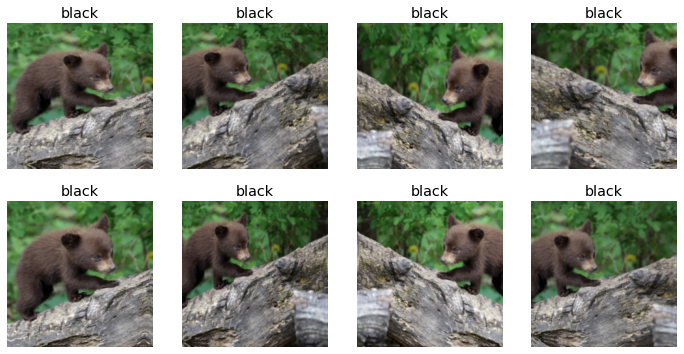

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())

dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.345893,0.143330,0.037736,02:13


epoch,train_loss,valid_loss,error_rate,time
0,0.237114,0.129001,0.028302,02:56
1,0.180928,0.184228,0.028302,02:57
2,0.159483,0.170603,0.028302,02:50
3,0.137254,0.152623,0.028302,02:54


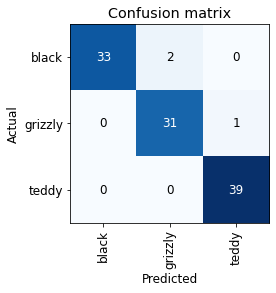

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

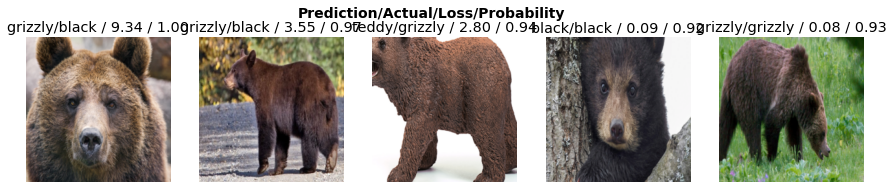

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
# after cleaning
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.455816,0.142398,0.028302,02:31


epoch,train_loss,valid_loss,error_rate,time
0,0.230852,0.151841,0.018868,02:52
1,0.184646,0.146465,0.018868,03:02
2,0.147046,0.164352,0.028302,02:50
3,0.124140,0.172009,0.028302,02:57


In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
# create an upload button
btn_upload = widgets.FileUpload()

#create a widget that will show the output
out_pl = widgets.Output(layout={'border': '10px solid blue'}) #Output widget

# create a widget that will show the result. 
lbl_pred = widgets.Label()

In [ ]:
#create a classifier button that is attached with the on click function.
# the on click function: user first uploads a photo, then a user clicks 'classify'. Then the program needs to read the file from the uploader widget, display it under the output widget and pass that image to the learner to make a prediction. 
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output() # clear up the output widget
    with out_pl: display(img.to_thumb(128,128)) # in the output region, show the image
    pred,pred_idx,probs = learn_inf.predict(btn_upload.data[-1]) # pass the uploaded image. For some reson, I need to directly read it from the file upload widget
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run = widgets.Button(description='Classify') 
btn_run.on_click(on_click_classify)

In [ ]:
# I basically created four buttons, and stack them each other. 
VBox([widgets.Label('Select your bear2!'), 
      btn_upload, btn_run, out_pl, lbl_pred])